In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
df = pd.read_csv("info_csv.csv") # reads the csv and creates the dataframe called movie
df.tail()
# len(df)

,id,age,birthdate,sex,salary,size,breakfast,lunch,dinner,late,...,shabu,grill,steak,fastfood,cake,dessert,coffee,juice,created_at,user_id
130,133,18,1999-05-05,female,"10,000-19,999",chubby,t,t,t,t,...,f,f,t,f,f,t,f,f,2018-04-22 13:06:48.438649+00,269
131,134,19,1998-06-16,male,"น้อยกว่า 10,000",thin,f,f,t,t,...,f,f,f,f,f,t,f,f,2018-04-27 12:33:20.426469+00,270
132,135,20,1998-01-16,male,"น้อยกว่า 10,000",thin,f,f,t,t,...,f,t,f,t,f,f,t,f,2018-04-29 11:47:20.711592+00,275
133,136,21,1996-12-24,male,"น้อยกว่า 10,000",chubby,t,t,f,t,...,f,f,t,t,t,t,f,t,2018-05-02 10:17:16.045991+00,277
134,137,21,1996-10-01,female,"10,000-19,999",fit,t,t,t,t,...,f,f,t,f,f,f,f,f,2018-05-04 07:27:43.494457+00,281


In [8]:
df2=df.drop(['birthdate','age'
            ,'breakfast','lunch','dinner','late','taste','price','service','clean',
            'at','location','facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill',
            'steak','fastfood','cake','dessert','coffee','juice','created_at','user_id'],1)

In [9]:
df2.head()

,id,sex,salary,size
0,1,male,"น้อยกว่า 10,000",fit
1,2,female,"น้อยกว่า 10,000",thin
2,3,female,"น้อยกว่า 10,000",fat
3,4,male,"น้อยกว่า 10,000",chubby
4,5,female,"น้อยกว่า 10,000",fat


# Size

In [33]:
df_dum_size = pd.get_dummies(df2, columns=['size'])
df_dum_size.head()

,id,sex,salary,size_chubby,size_fat,size_fit,size_thin
0,1,male,"น้อยกว่า 10,000",0,0,1,0
1,2,female,"น้อยกว่า 10,000",0,0,0,1
2,3,female,"น้อยกว่า 10,000",0,1,0,0
3,4,male,"น้อยกว่า 10,000",1,0,0,0
4,5,female,"น้อยกว่า 10,000",0,1,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 45, cost: 405.0
Run 1, iteration: 2/100, moves: 40, cost: 364.0
Run 1, iteration: 3/100, moves: 9, cost: 354.0
Run 1, iteration: 4/100, moves: 1, cost: 352.0
Run 1, iteration: 5/100, moves: 0, cost: 352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5, cost: 362.0
Run 2, iteration: 2/100, moves: 0, cost: 362.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5, cost: 429.0
Run 3, iteration: 2/100, moves: 0, cost: 429.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 361.0
Best run was number 1


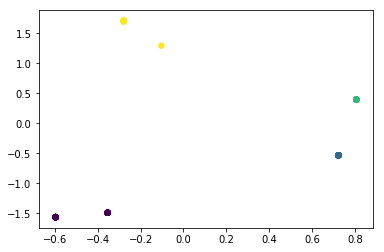

In [58]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

x = df_dum_size.reset_index().values

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
df_dum_size['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dum_size.ix[:,3:20])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

4
Estimated number of clusters: 4
Silhouette Coefficient: 0.968


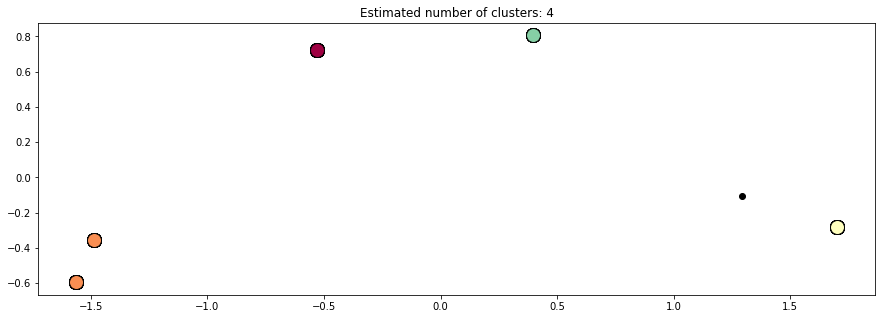

In [61]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_dum_size.ix[:,3:20])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Salary

In [62]:
df_dum_salary = pd.get_dummies(df2, columns=['salary'])
df_dum_salary.head()

,id,sex,size,"salary_10,000-19,999","salary_30,000-39,999","salary_50,000 ขึ้นไป","salary_น้อยกว่า 10,000"
0,1,male,fit,0,0,0,1
1,2,female,thin,0,0,0,1
2,3,female,fat,0,0,0,1
3,4,male,chubby,0,0,0,1
4,5,female,fat,0,0,0,1


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 41, cost: 372.0
Run 1, iteration: 2/100, moves: 9, cost: 372.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 42, cost: 350.0
Run 3, iteration: 2/100, moves: 1, cost: 350.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11, cost: 335.0
Run 5, iteration: 2/100, moves: 0, cost: 335.0
Best run was number 5


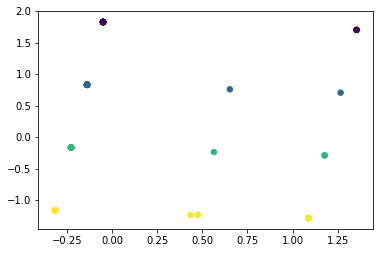

In [78]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

x = df_dum_salary.reset_index().values

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
df_dum_salary['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dum_salary.ix[:,3:20])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

5
Estimated number of clusters: 5
Silhouette Coefficient: 0.906


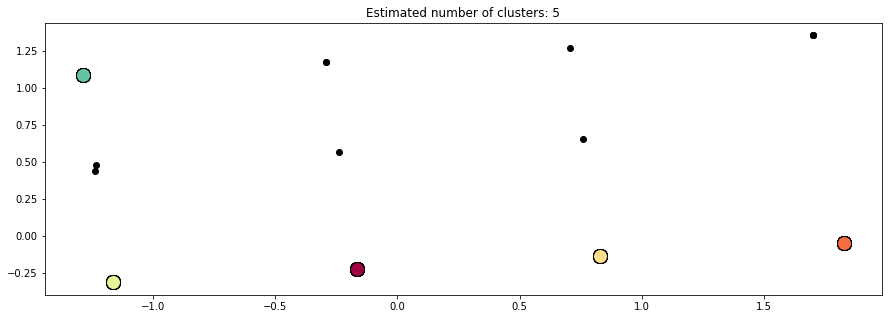

In [82]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_dum_salary.ix[:,3:20])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Meal

In [84]:
df.head()

,id,age,birthdate,sex,salary,size,breakfast,lunch,dinner,late,...,shabu,grill,steak,fastfood,cake,dessert,coffee,juice,created_at,user_id
0,1,21,1996-07-19,male,"น้อยกว่า 10,000",fit,f,t,t,f,...,f,f,t,t,t,t,f,t,2018-02-12 10:15:15.007524+00,4
1,2,20,1998-02-13,female,"น้อยกว่า 10,000",thin,f,t,t,t,...,f,f,f,t,t,f,f,f,2018-02-18 04:35:55.301258+00,23
2,3,22,1995-10-15,female,"น้อยกว่า 10,000",fat,f,t,t,f,...,f,f,t,t,f,t,f,t,2018-02-19 10:21:34.195126+00,29
3,4,19,1999-02-09,male,"น้อยกว่า 10,000",chubby,t,t,t,f,...,f,f,f,f,f,t,t,t,2018-02-19 11:03:40.193844+00,30
4,5,18,1999-05-05,female,"น้อยกว่า 10,000",fat,t,t,t,t,...,f,f,t,t,t,t,f,t,2018-02-19 11:11:51.049498+00,31


In [90]:
# df2=df.drop(['birthdate','age'
#             ,'breakfast','lunch','dinner','late','taste','price','service','clean',
#             'at','location','facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill',
#             'steak','fastfood','cake','dessert','coffee','juice','created_at','user_id'],1)

df_meal=df.drop(['id','birthdate','created_at',],1)
sex = {'male':0,'female':1}
size={'thin':0,'fit':1,'chubby':2,'fat':3}
salary={'น้อยกว่า 10,000':0,'10,000-19,999':1,'20,000-29,999':2,'30,000-39,999':3,'40,000-49,999':4,'50,000 ขึ้นไป':5}
breakfast = {'f':0,'t':1}
lunch = {'f':0,'t':1}
dinner = {'f':0,'t':1}
late = {'f':0,'t':1}
taste = {'f':0,'t':1}
price = {'f':0,'t':1}
service = {'f':0,'t':1}
clean = {'f':0,'t':1}
at = {'f':0,'t':1}
location = {'f':0,'t':1}
facebook = {'f':0,'t':1}
twitter = {'f':0,'t':1}
instagram = {'f':0,'t':1}
line = {'f':0,'t':1}
japanese = {'f':0,'t':1}
thai = {'f':0,'t':1}
diet = {'f':0,'t':1}
shabu = {'f':0,'t':1}
grill = {'f':0,'t':1}
steak = {'f':0,'t':1}
fastfood = {'f':0,'t':1}
cake = {'f':0,'t':1}
dessert = {'f':0,'t':1}
coffee = {'f':0,'t':1}
juice = {'f':0,'t':1}

for k,i in df_meal.iterrows():
    if i['sex']==i['sex']:
        df_meal.loc[k,"sexc"]=sex[i['sex']]
    if i['size']==i['size']:
        df_meal.loc[k,"sizec"]=size[i['size']]
    if i['salary']==i['salary']:
        df_meal.loc[k,"salaryc"]=salary[i['salary']]
    if i['breakfast']==i['breakfast']:
        df_meal.loc[k,"breakfastc"]=breakfast[i['breakfast']]
    if i['lunch']==i['lunch']:
        df_meal.loc[k,"lunchc"]=lunch[i['lunch']]
    if i['dinner']==i['dinner']:
        df_meal.loc[k,"dinnerc"]=breakfast[i['dinner']]
    if i['late']==i['late']:
        df_meal.loc[k,"latec"]=late[i['late']]
    if i['taste']==i['taste']:
        df_meal.loc[k,"tastec"]=taste[i['taste']]
    if i['price']==i['price']:
        df_meal.loc[k,"pricec"]=price[i['price']]
    if i['service']==i['service']:
        df_meal.loc[k,"servicec"]=service[i['service']]
    if i['clean']==i['clean']:
        df_meal.loc[k,"cleanc"]=clean[i['clean']]
    if i['at']==i['at']:
        df_meal.loc[k,"atc"]=at[i['at']]
    if i['location']==i['location']:
        df_meal.loc[k,"locationc"]=location[i['location']]
    if i['facebook']==i['facebook']:
        df_meal.loc[k,"facebookc"]=facebook[i['facebook']]
    if i['twitter']==i['twitter']:
        df_meal.loc[k,"twitterc"]=twitter[i['twitter']]
    if i['instagram']==i['instagram']:
        df_meal.loc[k,"instagramc"]=instagram[i['instagram']]
    if i['line']==i['line']:
        df_meal.loc[k,"linec"]=line[i['line']]
    if i['japanese']==i['japanese']:
        df_meal.loc[k,"japanesec"]=japanese[i['japanese']]
    if i['thai']==i['thai']:
        df_meal.loc[k,"thaic"]=thai[i['thai']]
    if i['diet']==i['diet']:
        df_meal.loc[k,"dietc"]=diet[i['diet']]
    if i['shabu']==i['shabu']:
        df_meal.loc[k,"shabuc"]=shabu[i['shabu']]
    if i['grill']==i['grill']:
        df_meal.loc[k,"grillc"]=grill[i['grill']]
    if i['steak']==i['steak']:
        df_meal.loc[k,"steakc"]=steak[i['steak']]
    if i['fastfood']==i['fastfood']:
        df_meal.loc[k,"fastfoodc"]=fastfood[i['fastfood']]
    if i['cake']==i['cake']:
        df_meal.loc[k,"cakec"]=grill[i['cake']]
    if i['dessert']==i['dessert']:
        df_meal.loc[k,"dessertc"]=dessert[i['dessert']]
    if i['coffee']==i['coffee']:
        df_meal.loc[k,"coffeec"]=coffee[i['coffee']]
    if i['juice']==i['juice']:
        df_meal.loc[k,"juicec"]=juice[i['juice']]

In [95]:
df_mealDrop = df_meal.drop(['breakfast','lunch','dinner','late','taste','price','service','clean','at','location',
                           'facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill','steak',
                            'dessert','coffee','juice','user_id','fastfood','cake','sex','salary'],1)
df_mealDrop.head()


,age,size,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,21,fit,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,20,thin,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,22,fat,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,19,chubby,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,18,fat,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 1183.0
Run 1, iteration: 2/100, moves: 12, cost: 1168.0
Run 1, iteration: 3/100, moves: 9, cost: 1167.0
Run 1, iteration: 4/100, moves: 0, cost: 1167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 36, cost: 1217.0
Run 2, iteration: 2/100, moves: 24, cost: 1199.0
Run 2, iteration: 3/100, moves: 29, cost: 1174.0
Run 2, iteration: 4/100, moves: 14, cost: 1161.0
Run 2, iteration: 5/100, moves: 0, cost: 1161.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 45, cost: 1175.0
Run 3, iteration: 2/100, moves: 6, cost: 1174.0
Run 3, iteration: 3/100, moves: 0, cost: 1174.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 46, cost: 1180.0
Run 4, iteration: 2/100, moves: 10, cost: 1175.0

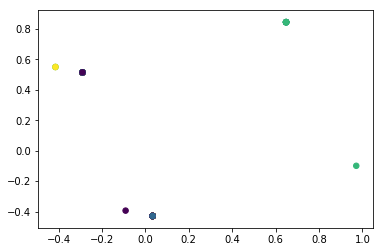

In [98]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

x = df_mealDrop.reset_index().values

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
# df_mealDrop['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_mealDrop.ix[:,5:8])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

3
Estimated number of clusters: 3
Silhouette Coefficient: 0.985


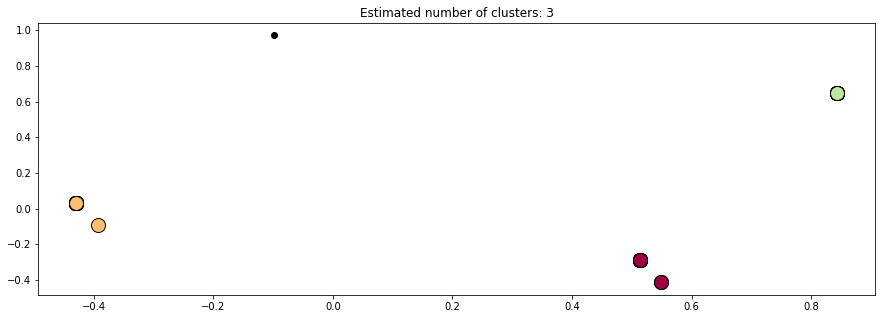

In [99]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_mealDrop.ix[:,5:8])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

2
Estimated number of clusters: 2
Silhouette Coefficient: 0.116


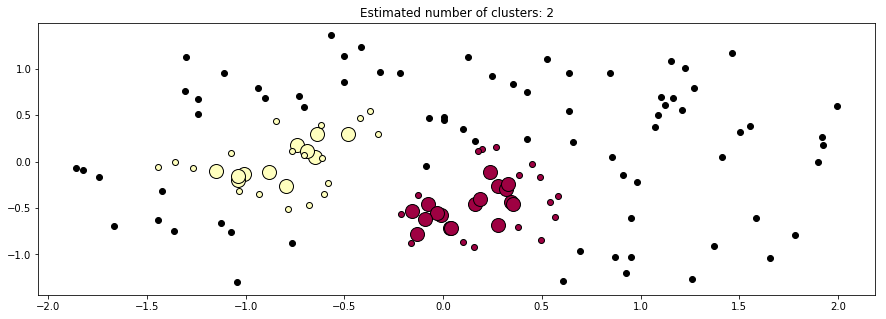

In [104]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_mealDrop.ix[:,5:])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [105]:
df_mealDrop.head()


,age,size,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,21,fit,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,20,thin,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,22,fat,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,19,chubby,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,18,fat,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


# Satisfaction


In [111]:
# dfSatisfaction = df_meal.drop(['breakfast','lunch','dinner','late','taste','price','service','clean','at','location',
#                            'facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill','steak',
#                             'dessert','coffee','juice','user_id','fastfood','cake','sex','salary','age','size','salaryc',
#                            'breakfastc','lunchc','dinnerc'],1)

df_profile = df_meal.drop(['breakfast','lunch','dinner','late','taste','price','service','clean','at','location',
                           'facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill','steak',
                            'dessert','coffee','juice','user_id','fastfood','cake','sex','salary','age','size',],1)
df_profile.head()


,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,pricec,servicec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


2
Estimated number of clusters: 2
Silhouette Coefficient: 0.069


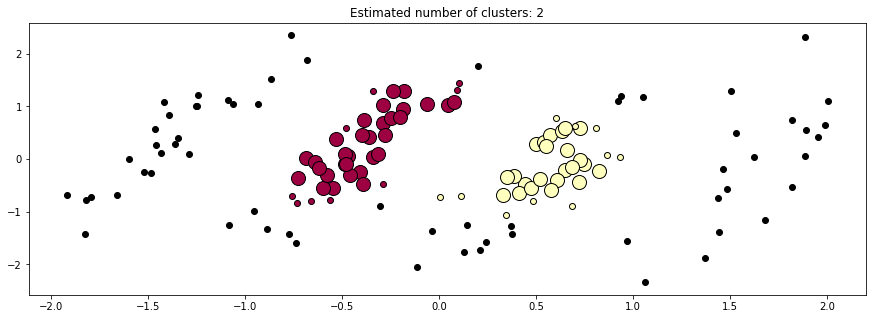

In [118]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_profile.ix[:,0:])



db = DBSCAN(eps=0.4, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19, cost: 1109.0
Run 1, iteration: 2/100, moves: 5, cost: 1107.0
Run 1, iteration: 3/100, moves: 4, cost: 1107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 38, cost: 1147.0
Run 2, iteration: 2/100, moves: 27, cost: 1117.0
Run 2, iteration: 3/100, moves: 6, cost: 1117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 39, cost: 1107.0
Run 3, iteration: 2/100, moves: 4, cost: 1107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 33, cost: 1119.0
Run 4, iteration: 2/100, moves: 10, cost: 1107.0
Run 4, iteration: 3/100, moves: 4, cost: 1107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 31, cost: 1108.0
Run 5, iteration:

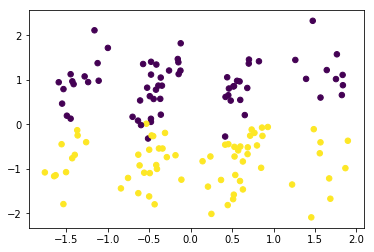

In [125]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

x = df_profile.reset_index().values

km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
df_profile['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_profile.ix[:,0:])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

In [129]:
from sklearn.preprocessing import StandardScaler
# data = df_profile.drop(['sizec'], axis=1)
X= StandardScaler().fit_transform(df_profile['sizec'].values.reshape(-1, 1))
RANDOM_SEED = 42

# X

In [131]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
X_train, X_test = train_test_split(df_profile, test_size=0.2, random_state=RANDOM_SEED)
# X_train = X_train[X_train.Class == 0]
# X_train = X_train.drop(['Class'], axis=1)
# y_test = X_test['Class']
# X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

ModuleNotFoundError: No module named 'tensorflow'